# Importing necessary Libraries

In [52]:
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
%matplotlib inline

### Importing Dataset

In [53]:
data = pd.read_csv("Mall_Customers.csv")

In [54]:
data.head(10)

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
5,6,Female,22,17,76
6,7,Female,35,18,6
7,8,Female,23,18,94
8,9,Male,64,19,3
9,10,Female,30,19,72


In [55]:
# Creating a copy of the Dataset so that it dont affect the Original Dataset
df = data.copy()

#### Overview of Data

In [56]:
# Checking missing values
df.isnull().sum()

CustomerID                0
Gender                    0
Age                       0
Annual Income (k$)        0
Spending Score (1-100)    0
dtype: int64

There are no missing values in any of the Features

In [57]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


In [58]:
df.shape

(200, 5)

There are 200 rows and 5 columns in our dataset

In [59]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
CustomerID                200 non-null int64
Gender                    200 non-null object
Age                       200 non-null int64
Annual Income (k$)        200 non-null int64
Spending Score (1-100)    200 non-null int64
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


##### Data Pre-processing (Handling Categorical Features) using One - Hot Encoding

In [60]:
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [88]:
df = pd.get_dummies(df, drop_first = True)

In [89]:
df.head(10)

,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Gender_Male
0,1,19,15,39,1
1,2,21,15,81,1
2,3,20,16,6,0
3,4,23,16,77,0
4,5,31,17,40,0
5,6,22,17,76,0
6,7,35,18,6,0
7,8,23,18,94,0
8,9,64,19,3,1
9,10,30,19,72,0


### Exploratory Data Analysis


#### Univariate Analysis

In [92]:
df['Gender_Male'].value_counts()

0    112
1     88
Name: Gender_Male, dtype: int64

Text(0,0.5,'Distribution Count')

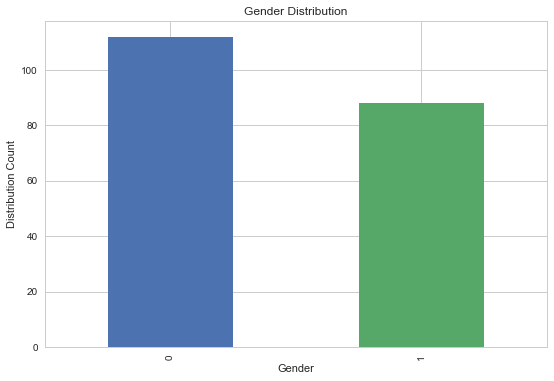

In [93]:
df.Gender_Male.value_counts().plot('bar', title = "Gender Distribution")
plt.xlabel('Gender')
plt.ylabel('Distribution Count')

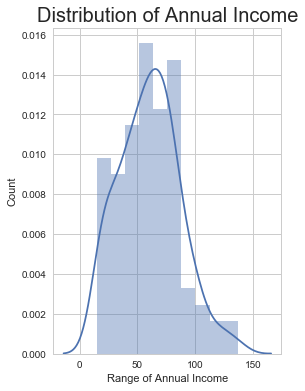

In [94]:
import warnings
warnings.filterwarnings('ignore')

import seaborn as sns
plt.subplot(1, 2, 1)
sns.set(style = 'whitegrid')
sns.distplot(df['Annual Income (k$)'])
plt.title('Distribution of Annual Income', fontsize = 20)
plt.xlabel('Range of Annual Income')
plt.ylabel('Count')
plt.show()

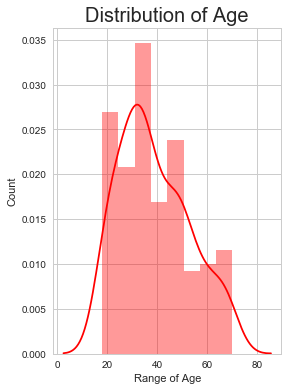

In [95]:
plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Age'], color = 'red')
plt.title('Distribution of Age', fontsize = 20)
plt.xlabel('Range of Age')
plt.ylabel('Count')
plt.show()

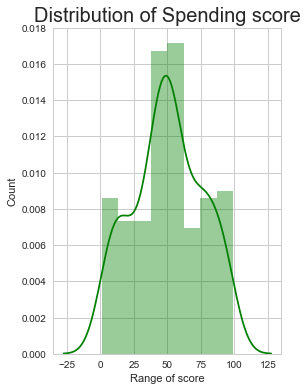

In [96]:
plt.subplot(1, 2, 2)
sns.set(style = 'whitegrid')
sns.distplot(df['Spending Score (1-100)'], color = 'green')
plt.title('Distribution of Spending score', fontsize = 20)
plt.xlabel('Range of score')
plt.ylabel('Count')
plt.show()

#### Bivariate Analysis

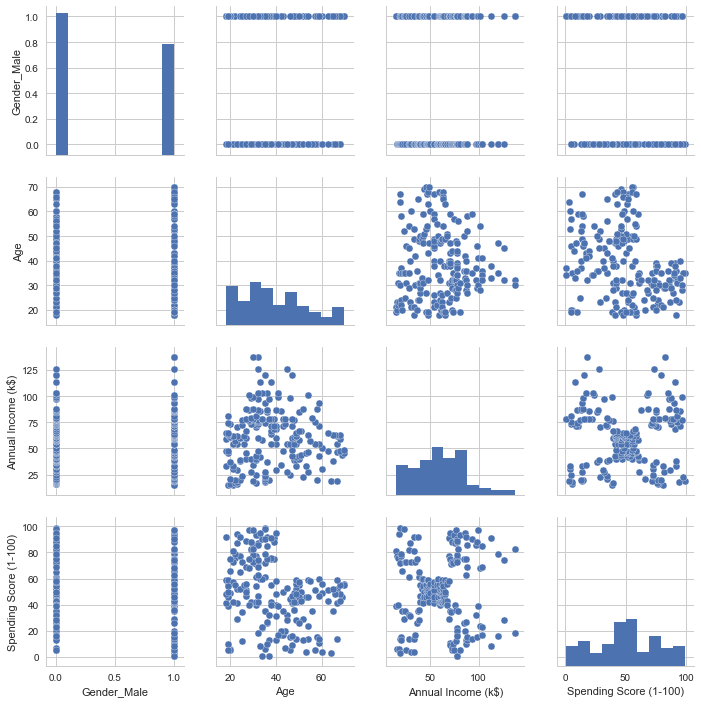

In [97]:
sns.pairplot(df[[ 'Gender_Male', 'Age', 'Annual Income (k$)','Spending Score (1-100)']])

Most of the customers are in the 20-40 age group.

Spending score is high for the customers in the age group of 20-40.

Spending score is high for customers with very low and very high income.

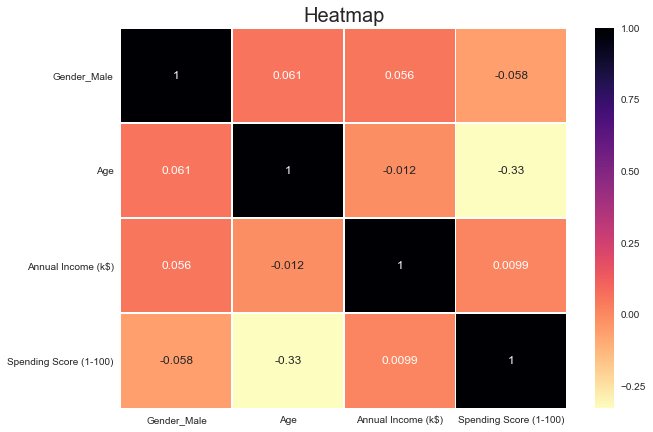

In [100]:
# Heatmap
plt.rcParams['figure.figsize'] = (10,7)
sns.heatmap(df[[ 'Gender_Male', 'Age', 'Annual Income (k$)','Spending Score (1-100)']].corr(), cmap = 'magma_r',annot = True, linewidths=.5)
plt.title('Heatmap', fontsize = 20)
plt.show()

There is no much correlation between features

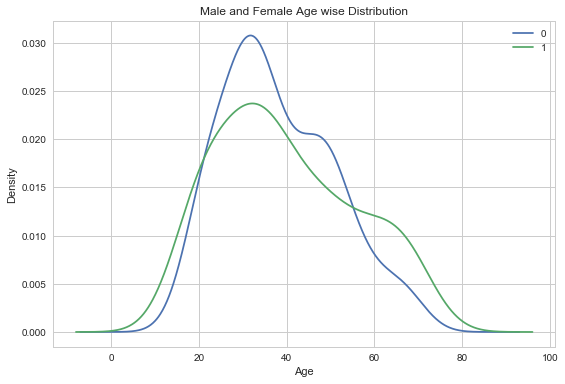

In [101]:
plt.rcParams['figure.figsize'] = (9,6)
df.groupby('Gender_Male').Age.plot(kind='kde')
plt.title("Male and Female Age wise Distribution")
plt.xlabel("Age")
plt.legend()

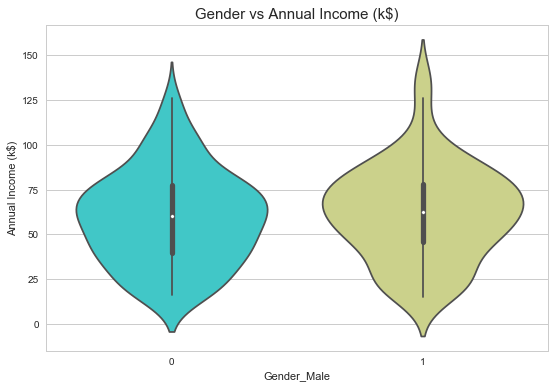

In [102]:
plt.rcParams['figure.figsize'] = (9,6)
sns.violinplot(df['Gender_Male'], df['Annual Income (k$)'], palette = 'rainbow')
plt.title('Gender vs Annual Income (k$)', fontsize = 15)
plt.show()

A Bivariate Analysis between the Gender and the Annual Income, to better visualize the Income of the different Genders.

There are more number of males who get paid more than females. But, The number of males and females are equal in number when it comes to low annual income.

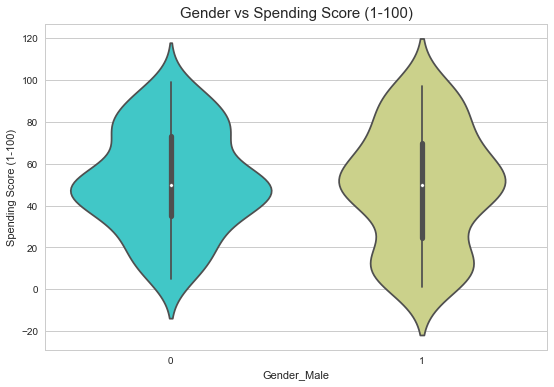

In [103]:
plt.rcParams['figure.figsize'] = (9,6)
sns.violinplot(df['Gender_Male'], df['Spending Score (1-100)'], palette = 'rainbow')
plt.title('Gender vs Spending Score (1-100)', fontsize = 15)
plt.show()

There are more number of males who spend less than females. But, the quartiles very close to each other

#### Independent Variables

In [133]:
df = df[['CustomerID','Age','Gender_Male','Annual Income (k$)','Spending Score (1-100)']]

In [134]:
X = df.iloc[:,[3,4]].values

In [135]:
X.shape

(200, 2)

### Using K-means for Clustering

In [136]:
from sklearn.cluster import KMeans
# (Within cluster sum of square) for Elbow method
wcss = []
for i in range(1, 11):
    k_means = KMeans(n_clusters = i, init = 'k-means++', max_iter = 300, n_init = 10)
    k_means.fit(X)
    wcss.append(k_means.inertia_) #inertia_ = to find the wcss value

In [137]:
font_title = {'family' : 'normal',
        'weight' : 'bold',
        'size'   : 20}

font_axes = {'family' : 'normal',
        'weight' : 'normal',
        'size'   : 20}

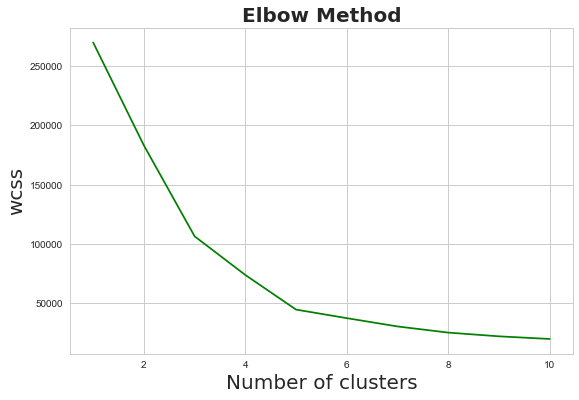

In [138]:
# Plotting number of Clusters vs wcss - Elbow Method
plt.plot(range(1,11), wcss,color = 'green')
plt.title('Elbow Method',**font_title)
plt.xlabel("Number of clusters",**font_axes)
plt.ylabel("wcss",**font_axes)
plt.show()

Hence we select that value where there is a Abrupt decrease. Hence number of clusters to be formed is 5.

#### Plotting the Clusters

In [139]:
#Taking number of clusters = 5
k_means = KMeans(n_clusters = 5, init = 'k-means++', max_iter = 300, n_init = 10)
y_kmeans = k_means.fit_predict(X)

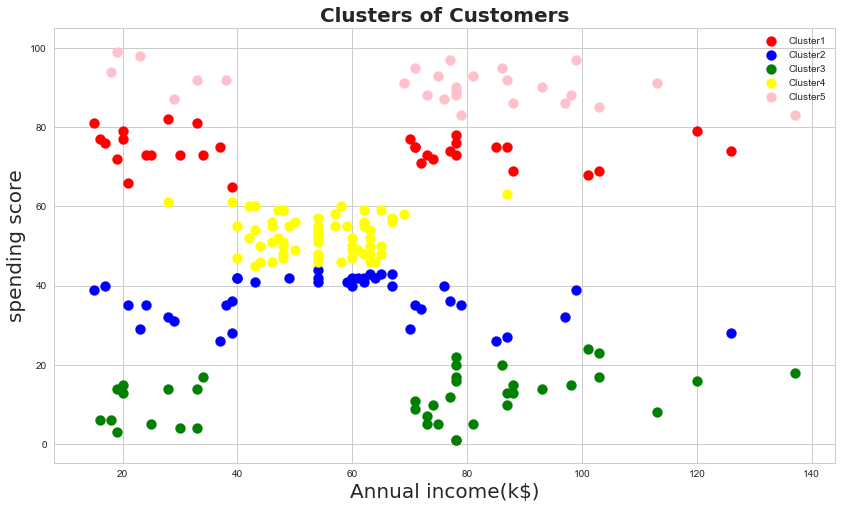

In [140]:
plt.figure(1, figsize = (14 , 8))
plt.scatter(X[pred == 0, 0], X[pred == 0, 1], s = 100, c = 'red', label = 'Cluster1')
plt.scatter(X[pred == 1, 0], X[pred == 1, 1], s = 100, c = 'blue', label = 'Cluster2')
plt.scatter(X[pred == 2, 0], X[pred == 2, 1], s = 100, c = 'green', label = 'Cluster3')
plt.scatter(X[pred == 3, 0], X[pred == 3, 1], s = 100, c = 'yellow', label = 'Cluster4')
plt.scatter(X[pred == 4, 0], X[pred == 4, 1], s = 100, c = 'pink', label = 'Cluster5')
plt.title('Clusters of Customers', **font_title)
plt.xlabel('Annual income(k$)', **font_axes)
plt.ylabel('spending score', **font_axes)
plt.legend()
plt.show()

Cluster1 : Low Annual Income - Low Spending Score

Cluster2 : Average Annual Income - Average Spending Score

Cluster3 : High Annual Income - Low Spending Score

Cluster4 : Low Annual Income - High Spending Score

Cluster5 : High Annual Income - High Spending Score